<a href="https://colab.research.google.com/github/dhanushpachabhatla/my-machine-learning-notes/blob/main/dates_%26_times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# handling mixed data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [9]:
df = df[['Cabin','Ticket','Parch','Survived']]

In [10]:
df.sample(3)

,Cabin,Ticket,Parch,Survived
711,C124,113028,0,0
109,NaN,371110,0,1
173,NaN,STON/O 2. 3101280,0,0


In [11]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
df['Cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['Cabin_cat'] = df['Cabin'].str[0] # captures letter part
df.head()

<ipython-input-12-574aa1d130e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
<ipython-input-12-574aa1d130e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin_cat'] = df['Cabin'].str[0] # captures letter part


,Cabin,Ticket,Parch,Survived,Cabin_num,Cabin_cat
0,NaN,A/5 21171,0,0,NaN,NaN
1,C85,PC 17599,0,1,85,C
2,NaN,STON/O2. 3101282,0,1,NaN,NaN
3,C123,113803,0,1,123,C
4,NaN,373450,0,0,NaN,NaN


<Axes: xlabel='Cabin_cat'>

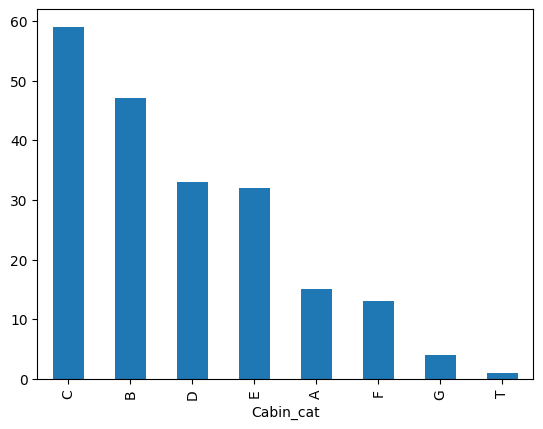

In [14]:
df['Cabin_cat'].value_counts().plot(kind='bar')

In [16]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(20)

<ipython-input-16-a910fb1c19b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
<ipython-input-16-a910fb1c19b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ticket_num'] = pd.to_numeric(df['ticket_num'],
<ipython-input-16-a910fb1c19b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Cabin,Ticket,Parch,Survived,Cabin_num,Cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,0,0,NaN,NaN,21171.0,A/5
1,C85,PC 17599,0,1,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,0,1,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,0,1,123,C,113803.0,NaN
4,NaN,373450,0,0,NaN,NaN,373450.0,NaN
5,NaN,330877,0,0,NaN,NaN,330877.0,NaN
6,E46,17463,0,0,46,E,17463.0,NaN
7,NaN,349909,1,0,NaN,NaN,349909.0,NaN
8,NaN,347742,2,1,NaN,NaN,347742.0,NaN
9,NaN,237736,0,1,NaN,NaN,237736.0,NaN


# working with date and time

In [17]:
date = pd.read_csv('orders.csv')
time = pd.read_csv('messages.csv')

In [18]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [19]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [20]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [21]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


object means it is string we cannot divide from string so we must convert it

#Working with Dates

* using pandas we can convert objects datatype like below :

In [22]:
date['date'] = pd.to_datetime(date['date'])

In [23]:
date['date_year'] = date['date'].dt.year
date['date_month_no'] = date['date'].dt.month
date['date_month_name'] = date['date'].dt.month_name()
date['date_day'] = date['date'].dt.day
date['date_dow'] = date['date'].dt.dayofweek
date['date_dow_name'] = date['date'].dt.day_name()
date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name
0,2019-12-10,2019,12,December,10,1,Tuesday
1,2018-08-15,2018,8,August,15,2,Wednesday
2,2018-10-23,2018,10,October,23,1,Tuesday
3,2019-08-17,2019,8,August,17,5,Saturday
4,2019-01-06,2019,1,January,6,6,Sunday


In [ ]:
# is weekend?

date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

date.drop(columns=['product_id','city_id','orders']).head()

# Time

In [24]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0
